- Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

- Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

- Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

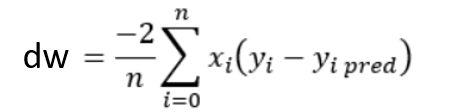
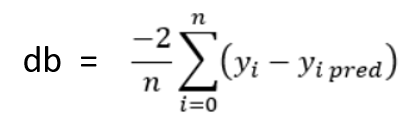

In [27]:
import numpy as np

### Linear Regression 

In [28]:
class Linear_Regression():
    
    # initializing the parameters (learning rate & no. of iterations)
    def __init__(self , learning_rate , no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
        
    def fit(self , X , Y ):
        # number of training examples & number of features     
        self.m , self.n  = X.shape # Number of rows and columns
        
        # Initiating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
        
    def update_weights(self , ):
        Y_prediction = self.predict(self.X)
        
        # Calculate gradients
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction)/self.m
        
        # Updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
    def predict(self , X):
        return X.dot(self.w) + self.b

#### Using Linear Regression model for Prediction

In [29]:
# importing the dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
# Data Preprocessing

In [31]:
salary_data = pd.read_csv('salary_data.csv')

In [32]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [33]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [34]:
salary_data.shape

(30, 2)

In [35]:
# checking for missing values

salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [36]:
# Splitting the feature & target

X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [37]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [38]:
print(Y)  

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [39]:
# Splitting the dataset into training & test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

In [40]:
# Training the Linear Regression model

model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)

In [41]:
model.fit(X_train, Y_train)

In [42]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


y = 9514(x) + 23697

salary = 9514(experience) + 23697

In [43]:
# Predict the salary value for test data
test_data_prediction = model.predict(X_test)

In [44]:
test_data_prediction = model.predict(X_test)

In [45]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


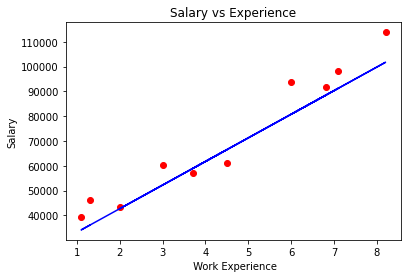

In [49]:
# Visualizing the predicted values & actual Values

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()